In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## 1 生成数据集并展示

In [15]:
n_train, n_test, num_inputs = 7000, 3000, 500
true_w, true_b = torch.ones(num_inputs, 1) * 0.0056, 0.028

features = torch.randn((n_train + n_test, num_inputs))
labels = torch.matmul(features, true_w) + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

## 2 读取数据

In [16]:
batch_size = 64
train_dataset = torch.utils.data.TensorDataset(train_features, train_labels)
test_dataset = torch.utils.data.TensorDataset(test_features, test_labels)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False,  num_workers=0)

In [17]:
for X, y in train_iter:
    print(X, y)
    break

tensor([[-0.5360,  0.1326,  0.4357,  ...,  0.2143,  0.1316, -0.7088],
        [-0.3249, -1.7800, -0.5290,  ..., -0.1309,  0.5058,  0.2661],
        [ 0.6711, -0.0920, -0.3607,  ..., -0.0952, -1.2506, -0.1592],
        ...,
        [ 0.9748, -1.2962, -1.4189,  ..., -2.3139,  0.5218,  0.3666],
        [-0.6736,  1.1214, -0.4537,  ..., -0.0175,  0.4833,  0.6736],
        [ 0.5261, -0.3321, -0.8941,  ...,  1.9597,  0.3530,  0.0650]]) tensor([[-0.0461],
        [ 0.1115],
        [ 0.1308],
        [ 0.1683],
        [ 0.0945],
        [ 0.0807],
        [-0.1968],
        [-0.0953],
        [-0.0464],
        [-0.1289],
        [-0.0750],
        [ 0.2539],
        [-0.0890],
        [-0.0906],
        [-0.1811],
        [ 0.0076],
        [-0.1164],
        [ 0.0488],
        [-0.0610],
        [ 0.0957],
        [-0.0606],
        [ 0.2338],
        [ 0.0260],
        [ 0.0447],
        [ 0.0109],
        [ 0.0634],
        [ 0.0904],
        [-0.1832],
        [ 0.2427],
        [ 0.008

## 3 初始化模型参数

In [18]:
num_inputs, num_outputs, num_hiddens = 500, 1, 200

W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype=torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
b2 = torch.zeros(num_outputs, dtype=torch.float)

params = [W1, b1, W2, b2]
for param in params:
    param.requires_grad_(requires_grad=True)

## 4 定义模型

In [19]:
# 定义激活函数
def relu(X):
    return torch.max(input=X, other=torch.tensor(0.0))

def net(X):
    X = X.view((-1, num_inputs))
    H = torch.mm(X, W1) + b1
    return torch.mm(H, W2) + b2

## 5 定义损失函数

In [20]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

## 6 定义优化算法

In [21]:
def SGD(params, lr):
    for param in params:
        param.data -= lr * param.grad

## 7 定义loss画图函数

In [22]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5)):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals, y2_vals, linestyle=':')
        plt.legend(legend)

## 8 训练模型

In [23]:
def train(net, train_iter, test_iter, loss, num_epochs, batch_size, params=None, lr=None, optimizer=None):
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y).sum()
            # 梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            # 反向传播 + 更新优化参数
            l.backward()
            if optimizer == None:
                SGD(params, lr)
            else:
                optimizer.step()
            
        train_ls.append(loss(net(train_features), train_labels).mean().item())
        test_ls.append(loss(net(test_features), test_labels).mean().item())
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss', range(1, num_epochs + 1), test_ls, ['train', 'test'])

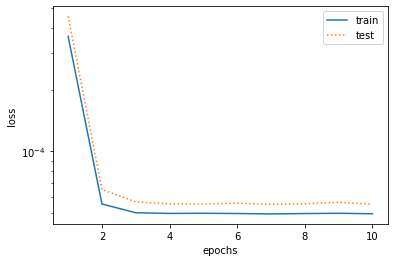

In [24]:
num_epochs = 10
lr = 0.003
train(net, train_iter, test_iter, squared_loss, num_epochs, batch_size, params, lr)